In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import yfinance as yf
df=yf.download("AAPL",start='2019-01-01',end='2023-01-01')
print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  38.047043  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.257282  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.719704  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.640198  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.319607  164101200


In [3]:
data=df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset=data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

958

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02684987],
       [0.        ],
       [0.010361  ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [5]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02684987, 0.        , 0.010361  , 0.00979771, 0.01461125,
       0.01898096, 0.01981736, 0.01723989, 0.01333105, 0.01857132,
       0.02176325, 0.02333362, 0.02497227, 0.0189639 , 0.02002218,
       0.01793974, 0.02657676, 0.02408467, 0.02131943, 0.03936161,
       0.04139285, 0.04152941, 0.04960314, 0.05460441, 0.05470684,
       0.049074  , 0.04816933, 0.04649653, 0.04898865, 0.04777672])]
[0.04883502910747295]

[array([0.02684987, 0.        , 0.010361  , 0.00979771, 0.01461125,
       0.01898096, 0.01981736, 0.01723989, 0.01333105, 0.01857132,
       0.02176325, 0.02333362, 0.02497227, 0.0189639 , 0.02002218,
       0.01793974, 0.02657676, 0.02408467, 0.02131943, 0.03936161,
       0.04139285, 0.04152941, 0.04960314, 0.05460441, 0.05470684,
       0.049074  , 0.04816933, 0.04649653, 0.04898865, 0.04777672]), array([0.        , 0.010361  , 0.00979771, 0.01461125, 0.01898096,
       0.01981736, 0.01723989, 0.01333105, 0.01857132, 0.02176325,
       0.02333362, 0.02497227, 0.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

928/928 [==============================] - 7s 6ms/step - loss: 0.0040


In [7]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 0s 7ms/step


C:\Users\yashk\AppData\Local\Temp\ipykernel_9904\3672404209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


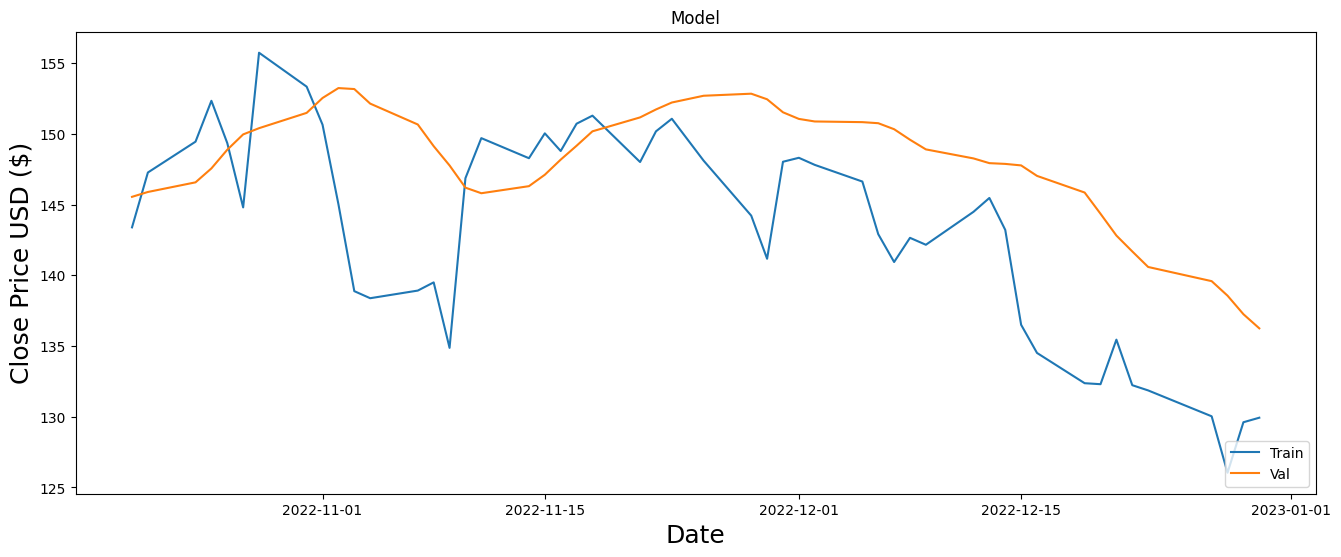

In [8]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [9]:
valid

,Close,Predictions
Date,,
2022-10-20,143.389999,145.549454
2022-10-21,147.270004,145.892731
2022-10-24,149.449997,146.574051
2022-10-25,152.339996,147.559631
2022-10-26,149.350006,148.879898
2022-10-27,144.800003,149.963806
2022-10-28,155.740005,150.403580
2022-10-31,153.339996,151.486694
2022-11-01,150.649994,152.538605
